In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file= "C:/Users/psais/OneDrive/Desktop/sowmya/Subjects Sem 2/DataSets/Datasets for Predictive Modelling with Python-20190708T233651Z-001/Datasets for Predictive Modelling with Python/Chapter 3/Customer Churn Model.txt" 
df= pd.read_csv(file,sep=",",header='infer')

In [3]:
#Getting the view of the data
df.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [4]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoder transforms variable names to dummy variables
LE = LabelEncoder()
df['VMail Plan'] = LE.fit_transform(df['VMail Plan'])
df['Churn?'] = LE.fit_transform(df['Churn?'])
df["Int'l Plan"] = LE.fit_transform(df["Int'l Plan"])

In [6]:
df.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


In [7]:
#Exploring Data 
#No of data points
len(df)

3333

In [8]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [9]:
df.describe()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


(array([2.000e+00, 1.000e+00, 1.900e+01, 1.160e+02, 4.690e+02, 9.170e+02,
        1.055e+03, 5.540e+02, 1.790e+02, 2.100e+01]),
 array([  0. ,  16.5,  33. ,  49.5,  66. ,  82.5,  99. , 115.5, 132. ,
        148.5, 165. ]),
 <a list of 10 Patch objects>)

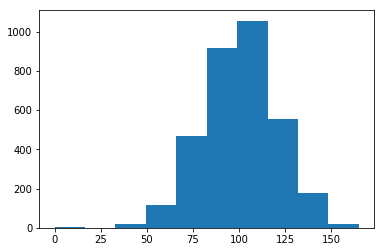

In [10]:
plt.hist(df['Day Calls'])

(array([  7.,  71., 279., 624., 888., 875., 434., 121.,  31.,   3.]),
 array([ 33. ,  47.2,  61.4,  75.6,  89.8, 104. , 118.2, 132.4, 146.6,
        160.8, 175. ]),
 <a list of 10 Patch objects>)

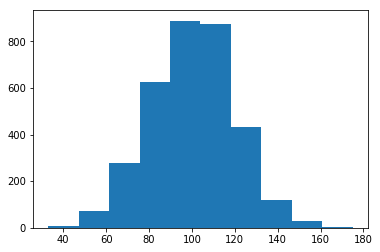

In [11]:
plt.hist(df['Night Calls'])

Text(0,0.5,'Day Calls')

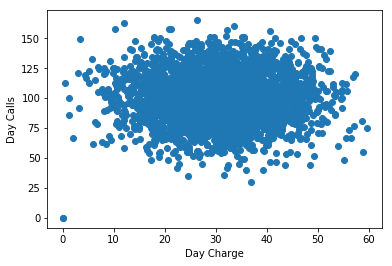

In [12]:
#Variation of calls by rates
x=df['Day Charge']
y=df['Day Calls']
plt.scatter(x,y)
plt.xlabel('Day Charge')
plt.ylabel('Day Calls')

Text(0,0.5,'Night Calls')

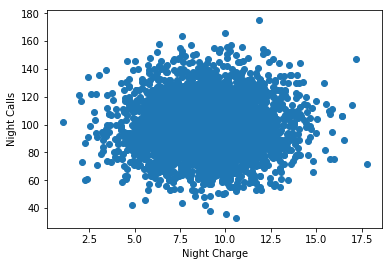

In [13]:
x=df['Night Charge']
y=df['Night Calls']
plt.scatter(x,y)
plt.xlabel('Night Charge')
plt.ylabel('Night Calls')

In [14]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
ID     73
MI     73
VT     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
NV     66
CO     66
WA     66
MA     65
RI     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
NE     61
DE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [15]:
df.corr()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
Account Length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area Code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Int'l Plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
VMail Plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
VMail Message,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Day Mins,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Day Calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Day Charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Eve Mins,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Eve Calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


In [16]:
df=df.drop(['State','Phone','Area Code'],axis=1)

In [17]:
df=df.drop('Account Length',axis=1)
df.head(2)

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [18]:
# Checking whether dataset is balanced
print(y[y==1].count())
print(y[y==0].count())

#ONly 14% of the data is representing custumer churned.
#Highly imbalanced dataset which might show bias towards our majority class

0
0


In [19]:
#Upsampling the minority class
from sklearn.utils import resample
df_majority=df[df['Churn?']==0]
df_minority=df[df['Churn?']==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2850,    # to match majority class
                                 random_state=123)

In [20]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [21]:
df_upsampled['Churn?'].value_counts()

1    2850
0    2850
Name: Churn?, dtype: int64

In [22]:
x= df_upsampled.iloc[:,0:-1]
y=df_upsampled.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

In [ ]:
# prediction on the test set
y_pred = svclassifier.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_Pred))